## Создание и Визуализация 3D Моделей с Использованием Blender и Matplotlib

### Введение

Создание 3D моделей в Blender не обязательно требует использования существующих объектов. Вместо этого можно воспользоваться текстовым редактором Python для написания скрипта, который генерирует необходимые поверхности и модели.

После создания модели в Blender её можно экспортировать в формат `.obj` для последующей работы. Однако важно отметить, что визуализация модели с использованием сторонних инструментов может не всегда соответствовать ожиданиям, что может привести к неожиданным результатам. Чтобы избежать подобных ситуаций, рекомендуется осуществлять визуализацию моделей самостоятельно.

### Процесс Визуализации

Для того чтобы отрисовать модель, созданную в Blender, необходимо выполнить следующие шаги:

1. В скрипте создания модели необходимо прописать сохранение вершин модели в файл формата `.txt`.
2. В том же скрипте следует прописать сохранение индексов граней в отдельный файл формата `.txt`(опционально).

Имея два этих файла, можно не только отрисовать точки, но и правильно соединить их, учитывая информацию из файла граней. Это позволяет создать более точное и визуально привлекательное представление 3D модели.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from IPython.display import display
import ipywidgets as widgets


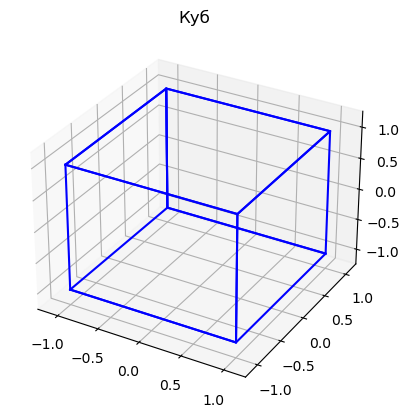

In [165]:

###В данном примере не были задействованы конвертации граней.Только вершины.
# Загружаем координаты из файла
with open("cube_points.txt", "r") as f:
    vertices = []
    for line in f:
        x, y, z = map(float, line.split())
        vertices.append([x, y, z])

# Преобразуем список координат в массив NumPy
vertices = np.array(vertices)

# Создаем фигуру и 3D-подграфик
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Определяем грани куба
faces = [[0, 1, 2, 3],
         [4, 5, 6, 7],
         [0, 4, 7, 3],
         [1, 5, 6, 2],
         [0, 1, 5, 4],
         [2, 3, 7, 6],
         [0, 3, 7, 4]] 

# Рисуем грани куба
for face in faces:
    ax.plot(vertices[face, 0], vertices[face, 1], vertices[face, 2], color='b')

# Устанавливаем лимиты осей
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])

ax.set_title('Куб')

# Отображаем график
plt.show()



### Например,чтобы реализовать модель куба в Blender можно использовать следующий скрипт в текстовом редакторе:



---

> ```python
> import bpy
> import bmesh
> import os
> 
> # Удаляем все объекты в сцене (по желанию)
> bpy.ops.object.select_all(action='DESELECT')
> bpy.ops.object.select_all(action='SELECT')
> bpy.ops.object.delete()
> 
> # Создаем новую сетку и объект для куба
> mesh = bpy.data.meshes.new("Cube")
> obj = bpy.data.objects.new("Cube", mesh)
> 
> # Добавляем объект в сцену
> bpy.context.collection.objects.link(obj)
> 
> # Создаем BMesh для работы с вершинами
> bm = bmesh.new()
> 
> # Определяем координаты вершин куба
> vertices = [
>     (-1, -1, -1),
>     (1, -1, -1),
>     (1, 1, -1),
>     (-1, 1, -1),
>     (-1, -1, 1),
>     (1, -1, 1),
>     (1, 1, 1),
>     (-1, 1, 1),
> ]
> 
> # Создаем вершины в BMesh
> for v in vertices:
>     bmesh.ops.create_vert(bm, co=v)
> 
> # Сохраняем вершины в меш
> bm.to_mesh(mesh)
> bm.free()
> 
> # Получаем текущую директорию
> current_directory = os.path.dirname(bpy.context.blend_data.filepath)
> 
> # Сохраняем координаты в файл
> with open(os.path.join(current_directory, "cube_points.txt"), "w") as f:
>     for v in mesh.vertices:
>         f.write(f"{v.co.x} {v.co.y} {v.co.z}\n")
> 
> # Выводим сообщение в консоль
> print(f"Координаты куба сохранены в файл: {os.path.join(current_directory, 'cube_points.txt')}")
> ```

---
### Отсюда мы получаем точки куба в формате .txt и можем их использовать для отрисовки в будущем!

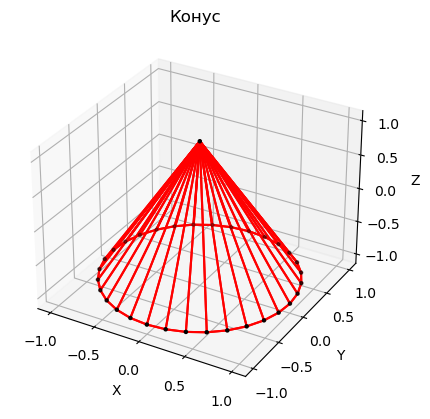

In [164]:


# Чтение координат вершин из файла
filename = "cone_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "cone_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='red')
# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=5)
# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Конус')

# Показать график
plt.show()

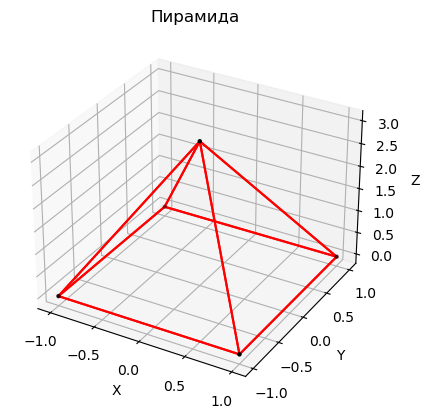

In [166]:


# Чтение координат вершин из файла
filename = "pyramid_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "pyramid_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='red')
# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=5)
# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Пирамида')

# Показать график
plt.show()

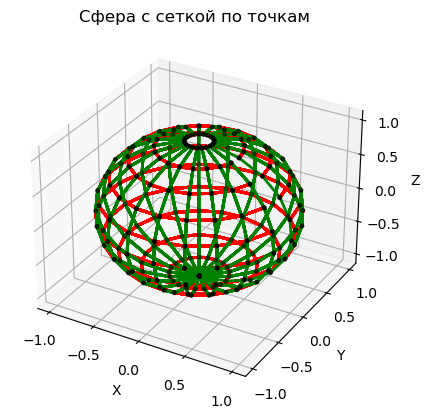

In [62]:


# Загрузка данных из файла и замена символа 'n' на пробел
with open('sphere_points.txt', 'r') as file:
    data = file.read().replace('n', ' ')

# Преобразуем строку в массив чисел
points = np.fromstring(data, sep=' ')

# Извлекаем координаты x, y, z
x = points[0::3]  # Каждое третье значение, начиная с 0
y = points[1::3]  # Каждое третье значение, начиная с 1
z = points[2::3]  # Каждое третье значение, начиная с 2

# Создаем фигуру для 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовываем точки на сфере
ax.scatter(x, y, z, color='black', s=7)

# Рисуем параллели (красные линии)
unique_latitudes = np.unique(np.arcsin(z / np.sqrt(x**2 + y**2 + z**2)))  # Получаем уникальные широты
for lat in unique_latitudes:
    # Находим точки с этой широтой
    mask = np.isclose(np.arcsin(z / np.sqrt(x**2 + y**2 + z**2)), lat)
    ax.plot(x[mask], y[mask], z[mask], color='red', linewidth=2)

# Рисуем меридианы (зеленые линии)
unique_longitudes = np.unique(np.arctan2(y, x))  # Получаем уникальные долготы
for lon in unique_longitudes:
    # Находим точки с этой долготой
    mask = np.isclose(np.arctan2(y, x), lon)
    ax.plot(x[mask], y[mask], z[mask], color='green', linewidth=2)

# Настройка осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Сфера')

# Показываем график
plt.show()


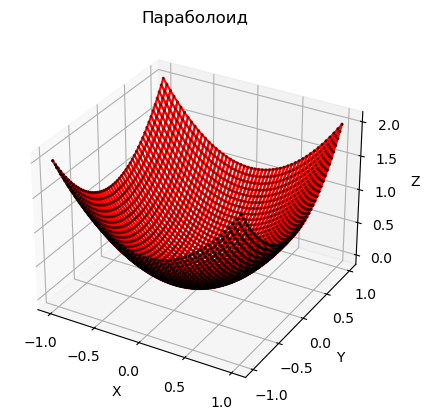

In [139]:


# Чтение координат вершин из файла
filename = "paraboloid_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "paraboloid_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='red')
# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=2)
# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Параболоид')

# Показать график
plt.show()

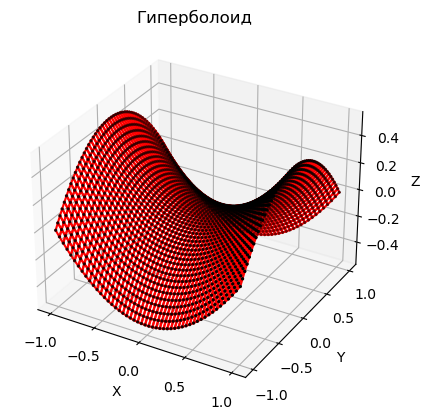

In [140]:


# Чтение координат вершин из файла
filename = "hyperboloid_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "hyperboloid_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='red')
# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=2)
# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Гиперболоид')

# Показать график
plt.show()

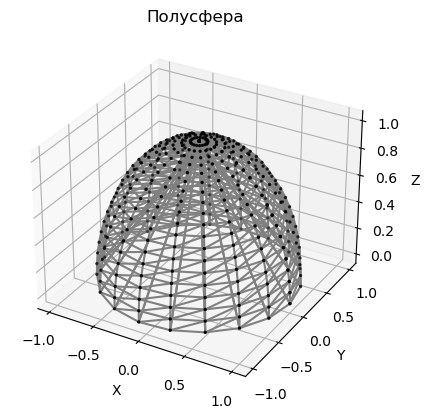

In [169]:

# Чтение координат вершин из файла
filename = "halfsphere_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "halfsphere_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='grey')
# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=2)
# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Полусфера')

# Показать график
plt.show()

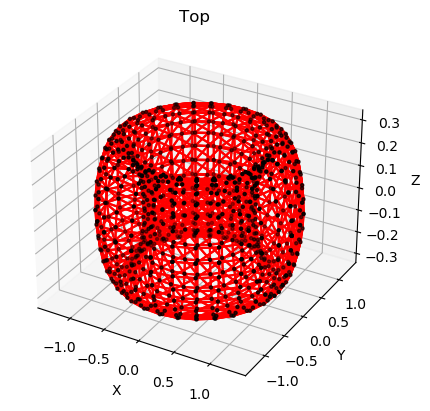

In [117]:

# Чтение координат вершин из файла
filename = "torus_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "torus_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='red')
# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=5)
# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Тор')

# Показать график
plt.show()

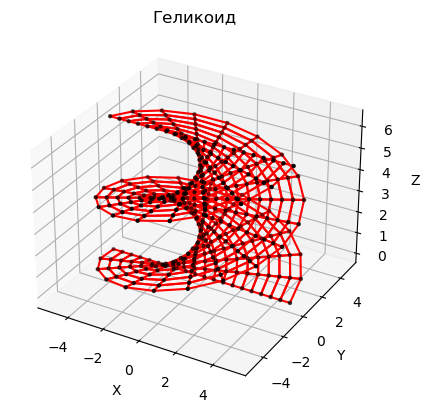

In [118]:


# Чтение координат вершин из файла
filename = "helicoids_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "helicoids_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='red')
# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=5)
# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Геликоид')

# Показать график
plt.show()

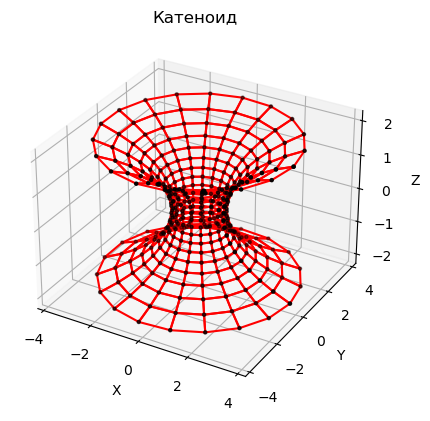

In [119]:


# Чтение координат вершин из файла
filename = "catenoids_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "catenoids_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='red')
# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=5)
# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Катеноид')

# Показать график
plt.show()

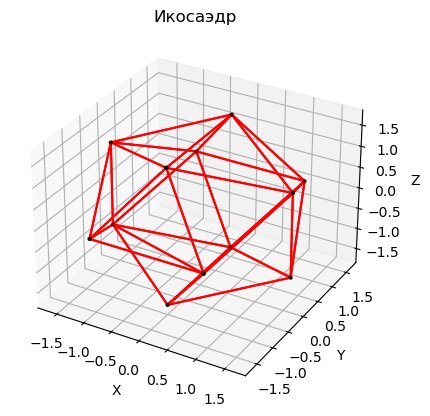

In [125]:


# Чтение координат вершин из файла
filename = "icosahedron_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "icosahedron_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='red')
# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=5)
# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Икосаэдр')

# Показать график
plt.show()

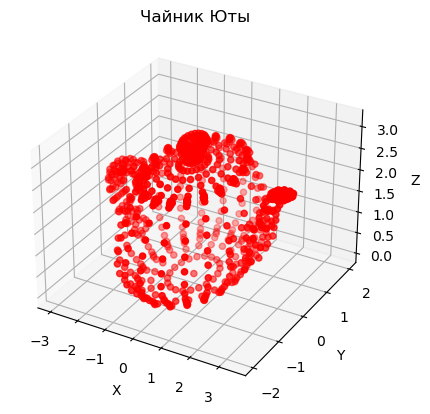

In [66]:

'''

Чайник Юты — самая сложная модель для отрисовки с использованием инструмента Matplotlib. 
Можно сказать, что такая модель просто не предназначена для отрисовки таким методом, но у меня все же получилось!
P.S. Я пробовала реализовать соединение точек с помощью поверхностей Безье, а не линий, но это не является рациональным решением. 
     Мой код грузился целых 7 минут! Поэтому такого эксперимента здесь не будет.
     
'''
# Чтение координат вершин из файла
filename = "teapot_vertices.txt"
vertices = []

with open(filename, "r") as f:
    for line in f:
        x, y, z = map(float, line.split())
        vertices.append((x, y, z))

# Преобразование в массив NumPy для удобства
vertices = np.array(vertices)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка вершин
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='r', marker='o')

# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Чайник Юты')

# Показать график
plt.show()


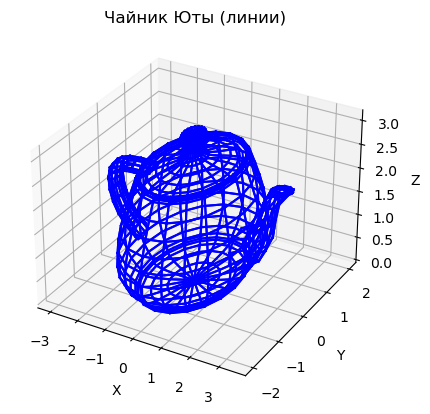

In [89]:


# Чтение координат вершин из файла
filename = "teapot_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "teapot_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='b')

# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Чайник Юты (линии)')

# Показать график
plt.show()


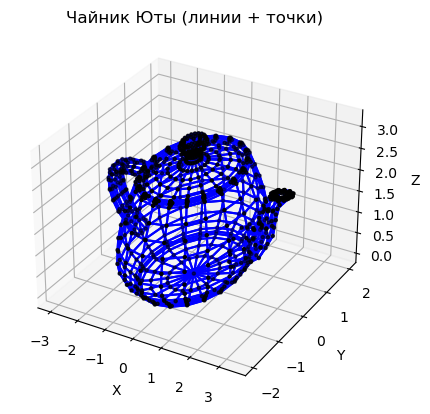

In [93]:


# Чтение координат вершин из файла
filename = "teapot_vertices.txt"
vertices = []

with open(filename, "r") as f:
  for line in f:
    x, y, z = map(float, line.split())
    vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
filename = "teapot_faces.txt"
faces = []

with open(filename, "r") as f:
  for line in f:
    face = list(map(int, line.split()))
    faces.append(face)

# Создание 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Отрисовка линий
for face in faces:
  for i in range(len(face)):
    # Получение индексов вершин для линии
    v1 = face[i]
    v2 = face[(i + 1) % len(face)] 
    
    # Отрисовка линии между вершинами
    ax.plot([vertices[v1][0], vertices[v2][0]], 
        [vertices[v1][1], vertices[v2][1]], 
        [vertices[v1][2], vertices[v2][2]], 
        color='b')

# Отрисовка точек вершин черным цветом
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=5) # s - размер маркера

# Установка меток осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Установка заголовка
ax.set_title('Чайник Юты (линии + точки)')

# Показать график
plt.show()


In [178]:


# Чтение координат вершин из файла
vertices_filename = "teapot_vertices.txt"
vertices = []

with open(vertices_filename, "r") as f:
    for line in f:
        x, y, z = map(float, line.split())
        vertices.append((x, y, z))

vertices = np.array(vertices)

# Чтение индексов граней из файла
faces_filename = "teapot_faces.txt"
faces = []

with open(faces_filename, "r") as f:
    for line in f:
        face = list(map(int, line.split()))
        faces.append(face)

# Функция для отрисовки графика
def plot_teapot(azimuth=0, elevation=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Отрисовка линий
    for face in faces:
        for i in range(len(face)):
            v1 = face[i]
            v2 = face[(i + 1) % len(face)]
            ax.plot([vertices[v1][0], vertices[v2][0]], 
                    [vertices[v1][1], vertices[v2][1]], 
                    [vertices[v1][2], vertices[v2][2]], 
                    color='b')

    # Отрисовка точек вершин черным цветом
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=5)

    # Установка меток осей
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Установка заголовка ax.set_title('Чайник Юты (линии + точки)')

    # Установка углов обзора
    ax.view_init(elev=elevation, azim=azimuth)

    plt.show()

# Создание ползунков для интерактивного управления
interact(plot_teapot, 
         azimuth=FloatSlider(value=0, min=0, max=360, step=1, description='Азимут'),
         elevation=FloatSlider(value=30, min=0, max=90, step=1, description='Угол наклона'));


interactive(children=(FloatSlider(value=0.0, description='Азимут', max=360.0, step=1.0), FloatSlider(value=30.…

In [112]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Чтение координат вершин из файла
# filename = "teapot_vertices.txt"
# vertices = []

# with open(filename, "r") as f:
#     for line in f:
#         x, y, z = map(float, line.split())
#         vertices.append((x, y, z))

# vertices = np.array(vertices)

# # Чтение индексов граней из файла
# filename = "teapot_faces.txt"
# faces = []

# with open(filename, "r") as f:
#     for line in f:
#         face = list(map(int, line.split()))
#         faces.append(face)

# # Функция для вычисления точки на поверхности Безье
# def bezier_surface(control_points, u, v):
#     # Базисные функции для поверхности Безье
#     b0 = (1 - u) * (1 - v)
#     b1 = u * (1 - v)
#     b2 = u * v
#     b3 = (1 - u) * v

#     # Вычисление координат на поверхности
#     x = b0 * control_points[0][0] + b1 * control_points[1][0] + b2 * control_points[2][0] + b3 * control_points[3][0]
#     y = b0 * control_points[0][1] + b1 * control_points[1][1] + b2 * control_points[2][1] + b3 * control_points[3][1]
#     z = b0 * control_points[0][2] + b1 * control_points[1][2] + b2 * control_points[2][2] + b3 * control_points[3][2]

#     return np.array([x, y, z])

# # Создание 3D-графика
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Отрисовка поверхностей для каждой грани
# for face in faces:
#     # Определение контрольных точек для поверхности
#     control_points = np.array([vertices[face[i]] for i in range(len(face))])
#     # Добавьте четвертую контрольную точку
#     control_points = np.append(control_points, [[0, 0, 0]], axis=0)

#     # Создание сетки значений для u и v
#     u_values = np.linspace(0, 1, 10)
#     v_values = np.linspace(0, 1, 10)

#     # Вычисление и отрисовка точек на поверхности
#     for u in u_values:
#         for v in v_values:
#             point = bezier_surface(control_points, u, v)
#             ax.scatter(*point, color='g', s=1)

# # Отрисовка точек вершин черным цветом
# ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='k', marker='o', s=5)  # s - размер маркера

# # Установка меток осей
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Установка заголовка
# ax.set_title('Чайник Юты (поверхности Безье)')

# # Показать график
# plt.show()



In [ ]:
### Птичка немного не пережила перелет из блендера в матплотлиб;(

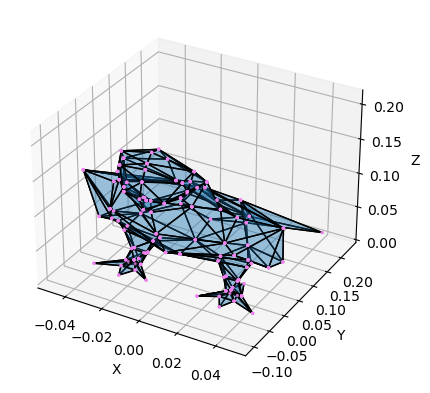

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Замените на путь к вашим файлам
vertices_file_path = "parrot_vertices.txt"  # Укажите путь к вашему файлу с вершинами
faces_file_path = "parrot_faces.txt"         # Укажите путь к вашему файлу с гранями

# Чтение вершин из файла
vertices = np.loadtxt(vertices_file_path)

# Чтение граней из файла
faces = []
with open(faces_file_path, 'r') as f:
    for line in f:
        face_indices = list(map(int, line.split()))
        # Вычитаем 1 из каждого индекса, чтобы привести к индексации с 0
        face_indices = [index - 1 for index in face_indices]
        faces.append(face_indices)

# Преобразуем индексы в массив NumPy
faces = np.array(faces)

# Переворот модели по оси Z
vertices[:, 2] = -vertices[:, 2]  # Умножаем координаты Z на -1

# Создаем фигуру
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Создаем полигоны для отрисовки
poly3d = [vertices[face] for face in faces]

# Отрисовка модели
ax.add_collection3d(Poly3DCollection(poly3d, linewidths=1, edgecolors='black', alpha=.25))
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='violet', s=2, label='точки')

# Устанавливаем пределы осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Устанавливаем пределы осей для лучшего отображения
ax.set_xlim(vertices[:, 0].min(), vertices[:, 0].max())
ax.set_ylim(vertices[:, 1].min(), vertices[:, 1].max())
ax.set_zlim(vertices[:, 2].min(), vertices[:, 2].max())

# Показать график
plt.show()


In [161]:


vertices_file_path = "parrot_vertices.txt"  
faces_file_path = "parrot_faces.txt"        

# Чтение вершин из файла
vertices = np.loadtxt(vertices_file_path)

# Чтение граней из файла
faces = []
with open(faces_file_path, 'r') as f:
    for line in f:
        face_indices = list(map(int, line.split()))
        # Вычитаем 1 из каждого индекса, чтобы привести к индексации с 0
        face_indices = [index - 1 for index in face_indices]
        faces.append(face_indices)

# Преобразуем индексы в массив NumPy
faces = np.array(faces)
# Переворот модели по оси Z
vertices[:, 2] = -vertices[:, 2]  # Умножаем координаты Z на -1
# Функция для обновления графика
def update_plot(azimuth, elevation):
    # Создаем фигуру
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Создаем полигоны для отрисовки
    poly3d = [vertices[face] for face in faces]

    ax.add_collection3d(Poly3DCollection(poly3d, linewidths=1, edgecolors='black', alpha=.25))
    
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='violet', s=2, label='точки')

    # Устанавливаем пределы осей
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Устанавливаем пределы осей для лучшего отображения
    ax.set_xlim(vertices[:, 0].min(), vertices[:, 0].max())
    ax.set_ylim(vertices[:, 1].min(), vertices[:, 1].max())
    ax.set_zlim(vertices[:, 2].min(), vertices[:, 2].max())

    ax.view_init(elev=elevation, azim=azimuth)

    plt.show()

# Создаем ползунки для азимута и угла наклона
azimuth_slider = widgets.FloatSlider(value=30, min=0, max=360, step=1, description='Azimuth')
elevation_slider = widgets.FloatSlider(value=30, min=0, max=90, step=1, description='Elevation')

# Используем interact для связывания ползунков с функцией обновления
widgets.interactive(update_plot, azimuth=azimuth_slider, elevation=elevation_slider)


interactive(children=(FloatSlider(value=30.0, description='Azimuth', max=360.0, step=1.0), FloatSlider(value=3…